In [1]:
# Example usage of different interpretability techniques.

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import torch
import torchvision.models as models
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import json

from vanilla_gradients import VanillaGradients
from visualization import visualize_mask

## Load Model and Example Image

In [7]:
# Load Inception V3 Model
def load_model_from_pytorch(architecture, pretrained=True):
    model = models.__dict__[architecture](pretrained=pretrained)
    return model 
MODEL = load_model_from_pytorch('inception_v3', pretrained=True).cuda().eval()

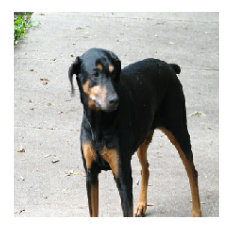

In [8]:
# Load Test Image
def load_image(file_path):
    im = PIL.Image.open(file_path)
    im = np.asarray(im)
    return im / 127.5 - 1.0 # normalize -1 to 1 for inception

def show_image(im, title='', ax=None):
    if ax is None:
        plt.figure()
    plt.axis('off')
    im = ((im + 1) * 127.5).astype(np.uint8)
    plt.imshow(im)
    plt.title(title)
    
IMAGE = load_image('./doberman.png')
show_image(IMAGE)

In [9]:
# Predict Image Class
with open('/data/angie/imagenet/labels.json', 'r') as f:
    labels = json.load(f)
input_instance = torch.from_numpy(IMAGE.transpose(2, 0, 1)).cuda().float()
input_batch = input_instance.unsqueeze(0)
output = MODEL(input_batch)
prediction = np.argmax(output.cpu().detach().numpy())
print(prediction, labels[prediction])

236 Dobermann


## Vanilla Gradients

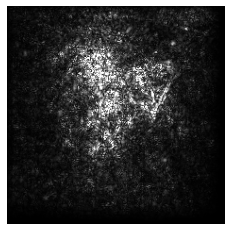

In [14]:
vanilla_gradients = VanillaGradients(MODEL)
gradients = vanilla_gradients.get_mask(input_instance)
mask = visualize_mask(gradients)

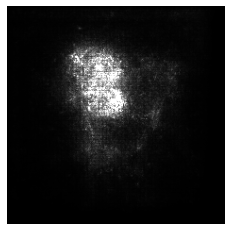

In [19]:
gradients = vanilla_gradients.get_smoothgrad_mask(input_instance)
mask = visualize_mask(gradients)